## Breast cancer prediction

Breast cancer data has a large number of features. PCA identifies the most significant patterns in the data and projects it onto a lower dimensional space, preserving the key information while reducing complexity.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('dark_background')
# matplotlib.rcParams['figure.dpi'] = 300

In [22]:
df = pd.read_csv("breast_cancer.csv")
print(df.head(5)) # first 5 records

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [23]:
print(f"shape: {df.shape}") # rows,columns

## Observation: The data has 31 columns/features/dimensions

shape: (569, 31)


In [24]:
# Extract X (independent variables/features). We apply PCA technique to this feature space.
X = df.drop(columns=["target"]).values  # Convert to numpy.ndarray

# Extract y (target variable)
y = df["target"].values  # Convert to numpy.ndarray

#Lets print first 2 records with thier labels
print(X[:2])  
print(y[:2])  

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
[0 0]


#  PCA 
Now lets apply PCA 

## step1: Standardize
**First step in PCA is to standardize the dataset**

In [25]:
# Standardize the dataset for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lets look at first 2 records. Also verify that mean is 0 and std dev is 1.
print(f"First 2 records: \n{X_scaled[:2]}")

First 2 records: 
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81

## Step2: Find the variance of each principal component

In [ ]:
# Perform PCA to get explained variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance for all 30 components
explained_variance_ratio = np.round(pca.explained_variance_ratio_,3)
print(explained_variance_ratio)

[0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014 0.012 0.01  0.009
 0.008 0.005 0.003 0.003 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.    0.    0.   ]


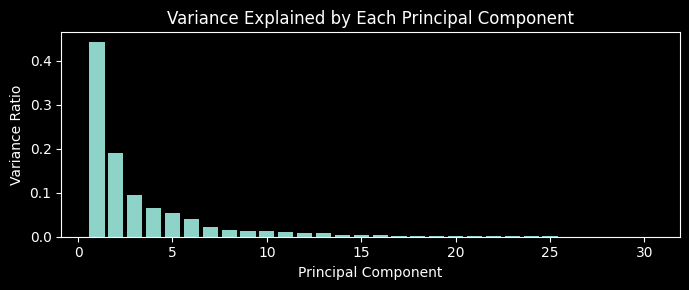

In [27]:
# Histogram-style bar plot
plt.figure(figsize=(7, 3))

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)

plt.title("Variance Explained by Each Principal Component", color='white')
plt.xlabel("Principal Component", color='white')
plt.ylabel("Variance Ratio", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

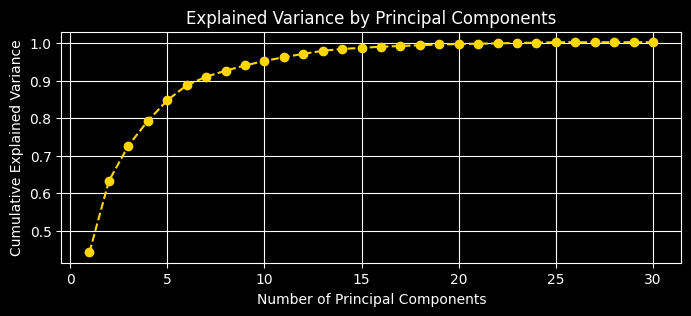

[0.443 0.633 0.727 0.793 0.848 0.888 0.911 0.927 0.941 0.953 0.963 0.972
 0.98  0.985 0.988 0.991 0.993 0.995 0.997 0.998 0.999 1.    1.001 1.002
 1.003 1.003 1.003 1.003 1.003 1.003]


In [28]:
# Now lets plot the cumulative sum
plt.figure(figsize=(8, 3))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(),
         marker='o', linestyle='--', color='gold')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

print(explained_variance_ratio.cumsum()) # print cumulative sume

## step3: Identify the number of components you need
**10 components seem to be a good number. It explains about 95% of variance.**

In [29]:
pca_10d = PCA(n_components=10)
X_pca_10d = pca_10d.fit_transform(X_scaled)

In [30]:
# Lets look at one data point, say the first one
print("The original data point in 30 dimension:\n", X[0],"\n")
print("The new data point in 10 dimension:\n", X_pca_10d[0]) # it has 10 features/dimensions

The original data point in 30 dimension:
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 

The new data point in 10 dimension:
 [ 9.19283683  1.94858307 -1.12316617  3.6337309  -1.19511012  1.41142447
  2.15936967 -0.39840621 -0.15711891 -0.87740612]


## step4: Work with this new dataset.
 **So now, replace X by --> X_pca_10d**

In [31]:
X = X_pca_10d